In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import GridSearchCV

In [2]:
%store -r xgb_data_risk

In [3]:
X = xgb_data_risk.drop('TARGET', axis=1)
y = xgb_data_risk['TARGET']

In [4]:
#print(xgb_data_risk['REJECTED'])
#print(xgb_data_risk.shape)
print(X.shape)

(291057, 240)


/Users/radimbadr/miniconda3/envs/unboxing_black_box/lib/python3.10/site-packages/xgboost/core.py:160: UserWarning: [08:32:27] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/radimbadr/miniconda3/envs/unboxing_black_box/lib/python3.10/site-packages/xgboost/core.py:160: UserWarning: [08:32:43] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)


[]
[]


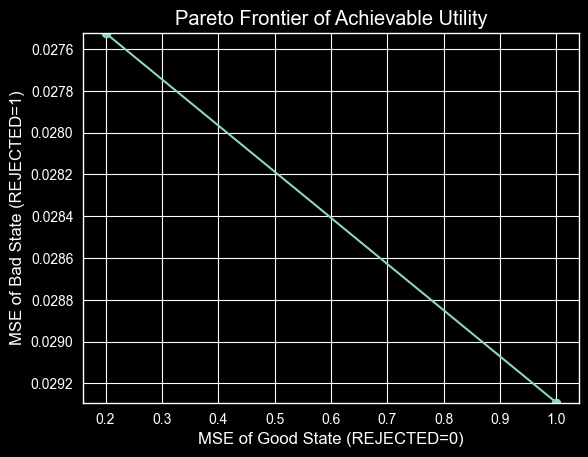

In [71]:
import xgboost as xgb
import numpy as np
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Assuming you have a DataFrame called 'data' with features and target variable
# 'REJECTED' is a column indicating whether the data is rejected (1) or not (0)
# 'target' is the target variable

# Define features and target variable
X = xgb_data_risk.drop(['TARGET'], axis=1)
y = xgb_data_risk['TARGET']

# Define the range of l values
l_values = [i / 100 for i in range(20, 101, 80)]

# Placeholder for MSE values
mse_good_state_values = []
mse_bad_state_values = []
mse_reg_values=[]
# Iterate through different l values
for l in l_values:
    # Create a weighted target variable based on 'REJECTED' values
    weighted_y = np.where(xgb_data_risk['REJECTED'] == 1, l * y, (1 - l) * y)

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, weighted_y, test_size=0.2, random_state=42)
 #   print(y_test.shape)
    # Define XGBoost parameters
    params = {
        'objective': 'reg:squarederror',
        'eval_metric': 'rmse',
        'learning_rate': 0.1,
        'max_depth': 3,
        'subsample': 0.8,
        'colsample_bytree': 0.8,
        'n_estimators': 100  # Corrected parameter name
    }

    # Create DMatrix for XGBoost
    dtrain = xgb.DMatrix(X_train, label=y_train)
    dtest = xgb.DMatrix(X_test, label=y_test)

    # Train the XGBoost model
    model = xgb.train(params, dtrain, num_boost_round=params['n_estimators'])

    # Make predictions on the test set
    y_pred = model.predict(dtest)

    # Calculate MSE for good state (REJECTED = 0)
 #   y_test=pd.DataFrame(y_test)
  #  y_pred=pd.DataFrame(y_pred)
  #  print(y_test.unique())
    #print(y_test[xgb_data_risk['REJECTED'] == 0])
   # print(y_test.shape)
  #  print(y_pred['REJECTED'] )

    mse_reg = mean_squared_error(y_test, y_pred)

    mse_reg_values.append(mse_reg)

 #   mse_good_state = mean_squared_error(y_test[xgb_data_risk['REJECTED'] == 0], y_pred[xgb_data_risk['REJECTED'] == 0])
    # Calculate MSE for bad state (REJECTED = 1)
  #  mse_bad_state = mean_squared_error(y_test[xgb_data_risk['REJECTED'] == 1], y_pred[xgb_data_risk['REJECTED'] == 1])

  #  mse_good_state_values.append(mse_good_state)
  #  mse_bad_state_values.append(mse_bad_state)

print(mse_good_state_values)
print(mse_bad_state_values)
# Plot the Pareto frontier
plt.plot(l_values, mse_reg_values, marker='o')
plt.xlabel('MSE of Good State (REJECTED=0)')
plt.ylabel('MSE of Bad State (REJECTED=1)')
#plt.xlim(max(mse_reg_values), min(mse_good_state_values))
plt.ylim(max(mse_reg_values), min(mse_reg_values))
plt.title('Pareto Frontier of Achievable Utility')
plt.show()


### Linear Model

/Users/radimbadr/miniconda3/envs/unboxing_black_box/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/radimbadr/miniconda3/envs/unboxing_black_box/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/radimbadr/miniconda3/envs/unboxing_black_box/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/radimbadr/miniconda3/envs/unboxing_black_box/lib/python3.10/site-packages/sklearn/utils/v

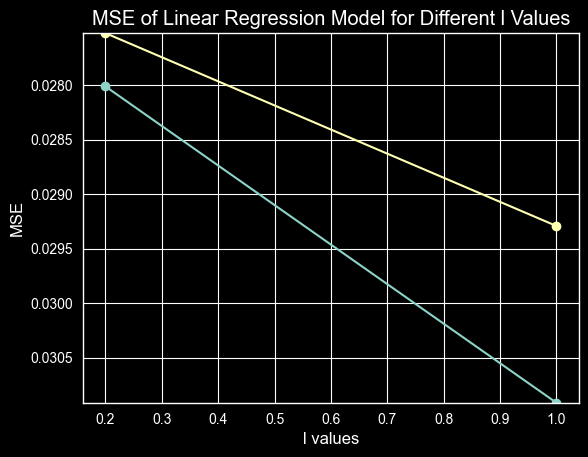

In [72]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd

# Assuming 'xgb_data_risk' is a DataFrame similar to the one used in the XGBoost model
# with columns 'TARGET', 'REJECTED', and other feature columns.


# Define the range of l values, same as in the XGBoost model
l_values_linear = [i / 100 for i in range(20, 101, 80)]

# Placeholder for MSE values
mse_reg_values_linear = []

# Iterate through different l values
for l in l_values:
    # Create a weighted target variable based on 'REJECTED' values
    weighted_y = np.where(xgb_data_risk['REJECTED'] == 1, l * y, (1 - l) * y)

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, weighted_y, test_size=0.2, random_state=42)
  #  print(y_test.head())
    # Create and train the Linear Regression model
    model_linear = LinearRegression()
    model_linear.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred_linear = model_linear.predict(X_test)

    # Calculate MSE
    mse_reg_linear = mean_squared_error(y_test, y_pred_linear)
    mse_reg_values_linear.append(mse_reg_linear)

# Plot the MSE values for different l values
plt.plot(l_values_linear, mse_reg_values_linear, marker='o')
#convex


print()
plt.plot(l_values, mse_reg_values, marker='o')
plt.ylim(max(mse_reg_values_linear), min(mse_reg_values))
plt.xlabel('l values')
plt.ylabel('MSE')
plt.title('MSE of Linear Regression Model for Different l Values')
plt.show()

In [101]:
l_values

array([0.2, 0.8])

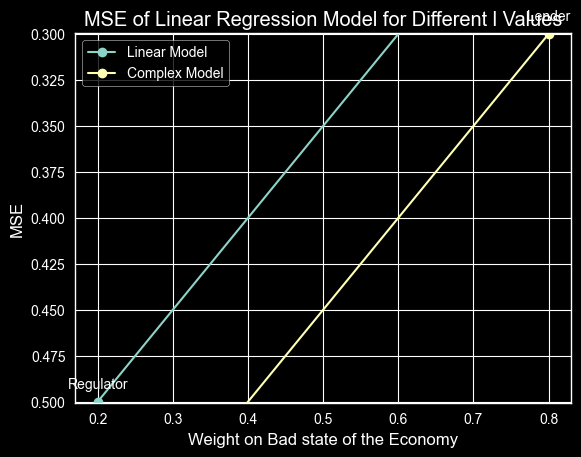

In [100]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('dark_background')

# Plot the MSE values for different l values
plt.plot(l_values_linear, mse_reg_values_linear, marker='o', label="Linear Model")
anno_lin=["Regulator", "Lender"]
for i, txt in enumerate(anno_lin):
    plt.annotate(txt, (l_values_linear[i], mse_reg_values_linear[i]), textcoords="offset points", xytext=(0,10), ha='center')
for i, txt in enumerate(anno_lin):
    plt.annotate(txt, (l_values[i], mse_reg_values[i]), textcoords="offset points", xytext=(0,10), ha='center')

#convex



plt.plot(l_values, mse_reg_values, marker='o', label="Complex Model")
plt.ylim(max(mse_reg_values_linear)+0.0005, min(mse_reg_values)-0.0005)
plt.xlabel('Weight on Bad state of the Economy')
plt.ylabel('MSE')
plt.title('MSE of Linear Regression Model for Different l Values')
plt.legend()
plt.savefig("RISK-7", bbox_inches="tight",
            pad_inches=0.3, transparent=True, dpi=300)
plt.show()


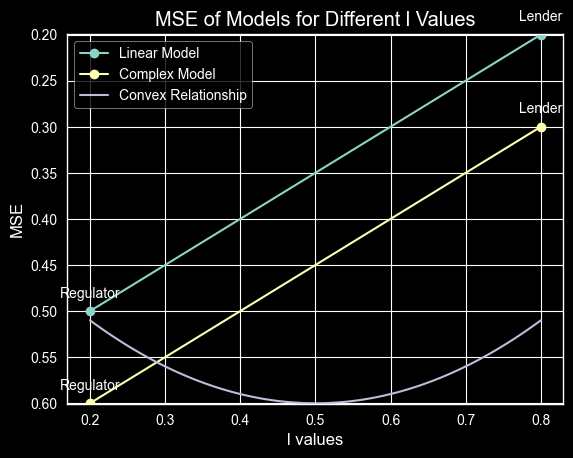

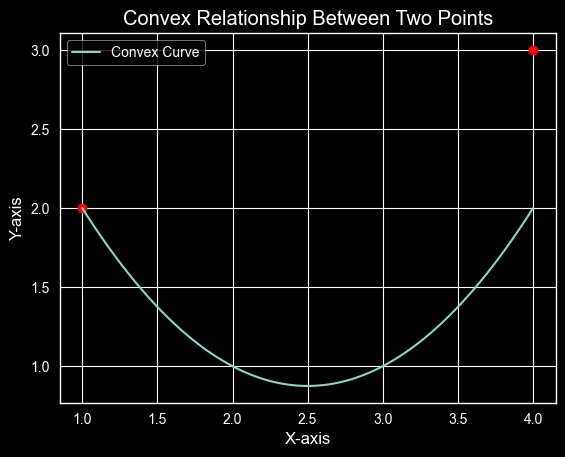

In [99]:

import numpy as np
import matplotlib.pyplot as plt

# Define the two points
x1, y1 = 1, 2
x2, y2 = 4, 3
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

plt.style.use('dark_background')

# Example data for l_values and mse_reg_values
l_values_linear = np.array([0.2, 0.8])  # Your l_values for the Linear Model
mse_reg_values_linear = np.array([0.5, 0.2])  # Your MSE values for the Linear Model

l_values = np.array([0.2, 0.8])  # Your l_values for the Complex Model
mse_reg_values = np.array([0.6, 0.3])  # Your MSE values for the Complex Model

# Plot the MSE values for different l values
plt.plot(l_values_linear, mse_reg_values_linear, marker='o', label="Linear Model")
plt.plot(l_values, mse_reg_values, marker='o', label="Complex Model")

# Annotate points
anno_lin = ["Regulator", "Lender"]
for i, txt in enumerate(anno_lin):
    plt.annotate(txt, (l_values_linear[i], mse_reg_values_linear[i]), textcoords="offset points", xytext=(0,10), ha='center')
for i, txt in enumerate(anno_lin):
    plt.annotate(txt, (l_values[i], mse_reg_values[i]), textcoords="offset points", xytext=(0,10), ha='center')

# Convex curve interpolation
# Generate new x values
x_new = np.linspace(min(l_values), max(l_values), 100)
# Define a convex function, for example, a simple quadratic
y_new = -1 * (x_new - np.mean(l_values))**2 + max(mse_reg_values)

# Plot the convex curve
plt.plot(x_new, y_new, label="Convex Relationship")

# Setting plot limits
plt.ylim(max(max(mse_reg_values_linear), max(mse_reg_values)) + 0.0005, min(min(mse_reg_values_linear), min(mse_reg_values)) - 0.0005)

# Final plot adjustments
plt.xlabel('l values')
plt.ylabel('MSE')
plt.title('MSE of Models for Different l Values')
plt.legend()

# Save before showing
plt.savefig("RISK-7", bbox_inches="tight", pad_inches=0.3, transparent=True, dpi=300)

# Show the plot
plt.show()
x_values = np.linspace(x1, x2, 100)

# Generate corresponding y values using a quadratic function
# Adjust the coefficient (0.5 in this case) to change the curvature
y_values = 0.5 * (x_values - x1) * (x_values - x2) + y1

# Plot the original points
plt.plot([x1, x2], [y1, y2], 'ro')  # 'ro' plots red dots

# Plot the convex curve
plt.plot(x_values, y_values, label='Convex Curve')

# Optional: Add labels, title, and legend
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Convex Relationship Between Two Points')
plt.legend()

# Show the plot
plt.show()

### REGULATOR OBJ

In [73]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Assume you have a DataFrame called 'data' with features and target variable
# 'rejected' is a column indicating whether the data is rejected (1) or not (0)

# Filter the data where 'rejected' is equal to 1
filtered_data_reg = xgb_data_risk[xgb_data_risk['REJECTED'] == 1]
print(filtered_data_reg['REJECTED'])

# Define your features and target variable
X = filtered_data_reg.drop(['TARGET', 'REJECTED'], axis=1)
y = filtered_data_reg['TARGET']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define XGBoost parameters
params_reg = {
        'objective': 'reg:squarederror',
        'eval_metric': 'rmse',
        'learning_rate': 0.1,
        'max_depth': 3,
        'subsample': 0.8,
        'colsample_bytree': 0.8,
        'n_estimators': 100
}

# Create DMatrix for XGBoost
dtrain_reg = xgb.DMatrix(X_train, label=y_train)
dtest_reg = xgb.DMatrix(X_test, label=y_test)

# Train the XGBoost model
model_reg = xgb.train(params_reg, dtrain_reg, num_boost_round=100)

# Make predictions on the test set
y_pred_reg = model_reg.predict(dtest_reg)
print(y_pred_reg)
# Evaluate the model
mse_reg = mean_squared_error(y_test, y_pred_reg)
roc = roc_auc_score(y_test, y_pred_reg)
print(f'Mean Squared Error: {mse_reg}')
print(f'ROC AUC: {roc}')

3         1
8         1
22        1
24        1
28        1
         ..
291045    1
291046    1
291049    1
291051    1
291056    1
Name: REJECTED, Length: 100294, dtype: int64


/Users/radimbadr/miniconda3/envs/unboxing_black_box/lib/python3.10/site-packages/xgboost/core.py:160: UserWarning: [08:36:16] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)


[0.03092168 0.17329554 0.27115396 ... 0.12005168 0.06881474 0.04335883]
Mean Squared Error: 0.08535632280311267
ROC AUC: 0.7456627076924353


/Users/radimbadr/miniconda3/envs/unboxing_black_box/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/radimbadr/miniconda3/envs/unboxing_black_box/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/radimbadr/miniconda3/envs/unboxing_black_box/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/radimbadr/miniconda3/envs/unboxing_black_box/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is dep

### LENDER OBJ

In [61]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the weights for different states
weights = xgb_data_risk['REJECTED'].replace({0: 0.8, 1: 0.2})

# Define XGBoost parameters
params_len = {
    'objective': 'reg:squarederror',  # Use squared error for regression
    'eval_metric': 'rmse',             # Use RMSE for evaluation
    'learning_rate': 0.1,
    'max_depth': 3,
    'subsample': 0.8,
    'colsample_bytree': 0.8,
    'n_estimators': 100,
    'sample_weight': weights  # Provide the weights
}

# Create DMatrix for XGBoost
dtrain_len = xgb.DMatrix(X_train, label=y_train, weight=weights.loc[X_train.index])
dtest_len = xgb.DMatrix(X_test, label=y_test, weight=weights.loc[X_test.index])

# Train the XGBoost model
model_len = xgb.train(params_len, dtrain_len, num_boost_round=100)

# Make predictions on the test set
y_pred_len = model_len.predict(dtest_len)

# Evaluate the model
mse_len = mean_squared_error(y_test, y_pred_len)
print(f'Mean Squared Error: {mse_len}')

/Users/radimbadr/miniconda3/envs/unboxing_black_box/lib/python3.10/site-packages/xgboost/core.py:160: UserWarning: [13:30:25] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "n_estimators", "sample_weight" } are not used.

  warnings.warn(smsg, UserWarning)


Mean Squared Error: 0.08539277594672266


/Users/radimbadr/miniconda3/envs/unboxing_black_box/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/radimbadr/miniconda3/envs/unboxing_black_box/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


### REG TESTING ON ALL


In [75]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Assuming xgb_data_risk is your DataFrame and contains the features, target variable 'target', and the column 'REJECTED'

# Separate the DataFrame into features and target
X = xgb_data_risk.drop('TARGET', axis=1)
y = xgb_data_risk['TARGET']



# Select only the observations where 'REJECTED' equals 1 for training
X_train = X[X['REJECTED'] == 1]
y_train = y[X['REJECTED'] == 1]

# Preparing the full dataset for testing
X_test = X.copy()
y_test = y.copy()

# Convert the training and testing sets into DMatrix, which is an internal data structure that XGBoost uses for optimized performance and efficiency
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

# Set up the parameters for XGBoost
params = {
    'objective': 'reg:squarederror',
    'eval_metric': 'rmse',  # Using RMSE (root mean squared error) as the evaluation metric
}

# Train the model
bst = xgb.train(params, dtrain, num_boost_round=100, evals=[(dtrain, 'train')])

# Make predictions on the testing set
y_pred = bst.predict(dtest)

# Calculate MSE on the testing set
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error on the testing set: {mse}")

[0]	train-rmse:0.29885
[1]	train-rmse:0.29543
[2]	train-rmse:0.29320
[3]	train-rmse:0.29164
[4]	train-rmse:0.29050
[5]	train-rmse:0.28949
[6]	train-rmse:0.28854
[7]	train-rmse:0.28797
[8]	train-rmse:0.28726
[9]	train-rmse:0.28678
[10]	train-rmse:0.28622
[11]	train-rmse:0.28554
[12]	train-rmse:0.28502
[13]	train-rmse:0.28471
[14]	train-rmse:0.28415
[15]	train-rmse:0.28370
[16]	train-rmse:0.28304
[17]	train-rmse:0.28266
[18]	train-rmse:0.28237
[19]	train-rmse:0.28192
[20]	train-rmse:0.28148
[21]	train-rmse:0.28122
[22]	train-rmse:0.28076
[23]	train-rmse:0.28056
[24]	train-rmse:0.28010
[25]	train-rmse:0.27983
[26]	train-rmse:0.27927
[27]	train-rmse:0.27900
[28]	train-rmse:0.27868
[29]	train-rmse:0.27856
[30]	train-rmse:0.27827
[31]	train-rmse:0.27809
[32]	train-rmse:0.27802
[33]	train-rmse:0.27768
[34]	train-rmse:0.27721
[35]	train-rmse:0.27671
[36]	train-rmse:0.27657
[37]	train-rmse:0.27609
[38]	train-rmse:0.27574
[39]	train-rmse:0.27526
[40]	train-rmse:0.27482
[41]	train-rmse:0.27471
[4

/Users/radimbadr/miniconda3/envs/unboxing_black_box/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/radimbadr/miniconda3/envs/unboxing_black_box/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


split bad and goog mse


In [85]:

xgb_data_risk['y_pred']=y_pred
#print(X_test.shape)
#mse_pd = mean_squared_error(xgb_data_risk['TARGET'], xgb_data_risk['y_pred'])
xgb_data_risk_bad = xgb_data_risk[xgb_data_risk['REJECTED'] == 1]

mse_reg_bad=mean_squared_error(xgb_data_risk_bad['TARGET'], xgb_data_risk_bad['y_pred'])
xgb_data_risk_good = xgb_data_risk[xgb_data_risk['REJECTED'] == 0]
mse_reg_good=mean_squared_error(xgb_data_risk_good['TARGET'], xgb_data_risk_good['y_pred'])
print(mse_reg_good)
print(mse_reg_bad)

/Users/radimbadr/miniconda3/envs/unboxing_black_box/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/radimbadr/miniconda3/envs/unboxing_black_box/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/radimbadr/miniconda3/envs/unboxing_black_box/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/radimbadr/miniconda3/envs/unboxing_black_box/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is dep

0.06388148994377034
0.06708695302495142


/Users/radimbadr/miniconda3/envs/unboxing_black_box/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/radimbadr/miniconda3/envs/unboxing_black_box/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/radimbadr/miniconda3/envs/unboxing_black_box/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/radimbadr/miniconda3/envs/unboxing_black_box/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is dep

In [97]:
#weights = xgb_data_risk['REJECTED'].replace({0: 0.8, 1: 0.2})
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Assuming xgb_data_risk is your DataFrame and contains the features, target variable 'target', and the column 'REJECTED'

# Separate the DataFrame into features and target
X = xgb_data_risk.drop('TARGET', axis=1)
y = xgb_data_risk['TARGET']



# Select only the observations where 'REJECTED' equals 1 for training
X_train['weights'] = X['REJECTED'].replace({0: 0.8, 1: 0.2})
#y_train['weights'] = y['REJECTED'].replace({0: 0.8, 1: 0.2})

X_train.drop('REJECTED')
#y_train.drop('REJECTED')

# Preparing the full dataset for testing
X_test = X.copy()
y_test = y.copy()

# Convert the training and testing sets into DMatrix, which is an internal data structure that XGBoost uses for optimized performance and efficiency
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

# Set up the parameters for XGBoost
params = {
    'objective': 'reg:squarederror',
    'eval_metric': 'rmse',  # Using RMSE (root mean squared error) as the evaluation metric
}

# Train the model
bst = xgb.train(params, dtrain, num_boost_round=100, evals=[(dtrain, 'train')])

# Make predictions on the testing set
y_pred = bst.predict(dtest)

# Calculate MSE on the testing set
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error on the testing set: {mse}")

KeyError: "['REJECTED'] not found in axis"

In [92]:

xgb_data_risk['y_pred_len']=y_pred_len
#print(X_test.shape)
#mse_pd = mean_squared_error(xgb_data_risk['TARGET'], xgb_data_risk['y_pred'])
xgb_data_risk_bad = xgb_data_risk[xgb_data_risk['REJECTED'] == 1]

mse_reg_bad.append(mean_squared_error(xgb_data_risk_bad['TARGET'], xgb_data_risk_bad['y_pred_len']))
xgb_data_risk_good = xgb_data_risk[xgb_data_risk['REJECTED'] == 0]
mse_reg_good.append(mean_squared_error(xgb_data_risk_good['TARGET'], xgb_data_risk_good['y_pred_len']))
print(mse_reg_good)
print(mse_reg_bad)

ValueError: Length of values (58212) does not match length of index (291057)

TypeError: 'numpy.float64' object is not iterable

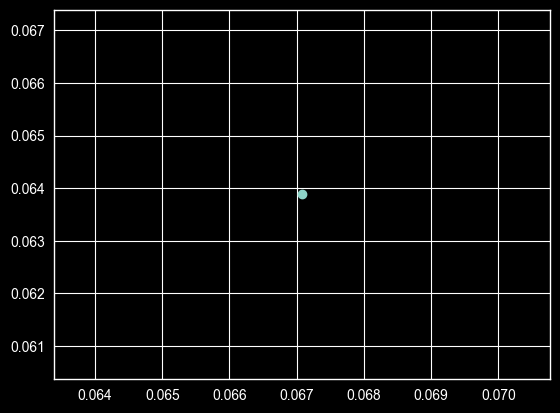

In [89]:
import matplotlib.pyplot as plt
plt.style.use('dark_background')
# Plot the MSE values for different l values
plt.plot(mse_reg_bad, mse_reg_good, marker='o', label="Linear Model")
anno_lin=["Regulator", "Lender"]
for i, txt in enumerate(anno_lin):
    plt.annotate(txt, (l_values_linear[i], mse_reg_values_linear[i]), textcoords="offset points", xytext=(0,10), ha='center')
for i, txt in enumerate(anno_lin):
    plt.annotate(txt, (l_values[i], mse_reg_values[i]), textcoords="offset points", xytext=(0,10), ha='center')

#convex



#plt.plot(l_values, mse_reg_values, marker='o', label="Complex Model")
plt.ylim(max(mse_reg_bad), min(mse_reg_bad))
plt.xlabel('l values')
plt.ylabel('MSE')
plt.title('MSE of Linear Regression Model for Different l Values')
plt.legend()
plt.savefig("RISK-7", bbox_inches="tight",
            pad_inches=0.3, transparent=True, dpi=300)
plt.show()

In [43]:
predictions_reg = model_reg.predict(dtest_reg)
predictions_len = model_len.predict(dtest_len)

print(predictions_len)
print(predictions_reg)

[0.00206192 0.17931718 0.07400121 ... 0.04033025 0.10961928 0.01414187]
[0.03092168 0.17329554 0.27115396 ... 0.12005168 0.06881474 0.04335883]


In [41]:
pareto_frontier = []

for point_reg, point_len in zip(predictions_reg, predictions_len):
    dominated = False
    for other_reg, other_len in zip(predictions_reg, predictions_len):
        if point_reg >= other_reg and point_len >= other_reg and (point_reg > other_reg or point_len > other_len):
            dominated = True
            break
    if not dominated:
        pareto_frontier.append((point_reg, point_len))

print(pareto_frontier)

[(-0.06714391, -0.00012312146)]


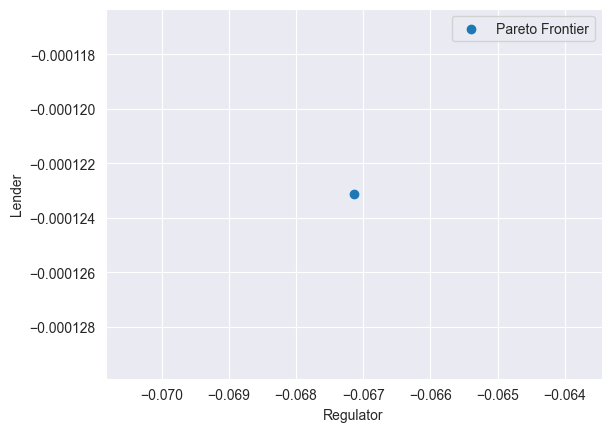

In [44]:
import matplotlib.pyplot as plt

pareto_frontier = list(zip(*pareto_frontier))

plt.scatter(pareto_frontier[0], pareto_frontier[1], marker='o', label='Pareto Frontier')
plt.xlabel('Regulator')
plt.ylabel('Lender')
plt.legend()
plt.show()

In [71]:
import xgboost as xgb
import numpy as np
from sklearn.metrics import mean_squared_error

# Assuming you have a DataFrame called 'data' with features and target variable
# 'REJECTED' is a column indicating whether the data is rejected (1) or not (0)
# 'target' is the target variable

# Define features and target variable

# Define the range of l values
l_values = [i / 100 for i in range(20, 101, 5)]

# Placeholder for utility values
utility_values = []
l_values

[0.2,
 0.25,
 0.3,
 0.35,
 0.4,
 0.45,
 0.5,
 0.55,
 0.6,
 0.65,
 0.7,
 0.75,
 0.8,
 0.85,
 0.9,
 0.95,
 1.0]

In [74]:


# Iterate through different l values
for l in l_values:
    # Create a weighted target variable based on 'REJECTED' values
    weighted_y = np.where(xgb_data_risk['REJECTED'] == 1, l * y, (1 - l) * y)

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, weighted_y, test_size=0.2, random_state=42)

    # Define XGBoost parameters
    params = {
        'objective': 'reg:squarederror',
        'eval_metric': 'rmse',
        'learning_rate': 0.1,
        'max_depth': 3,
        'subsample': 0.8,
        'colsample_bytree': 0.8,
        'n_estimators': 100
    }

    # Create DMatrix for XGBoost
    dtrain = xgb.DMatrix(X_train, label=y_train)
    dtest = xgb.DMatrix(X_test, label=y_test)

    # Train the XGBoost model
    model = xgb.train(params, dtrain, num_boost_round=100)

    # Make predictions on the test set
    y_pred = model.predict(dtest)

    # Calculate MSE
    mse = mean_squared_error(y_test, y_pred)

    # Calculate utility based on your definition (for example, negative MSE)
    utility = mse

    utility_values.append(utility)

# Plot the Pareto frontier
plt.plot(l_values, utility_values, marker='o')
plt.xlabel('Weight on Bad State (\ell)')
plt.ylabel('Achieved Utility')
plt.title('Pareto Frontier of Achievable Utility')
plt.show()

/Users/radimbadr/miniconda3/envs/unboxing_black_box/lib/python3.10/site-packages/xgboost/core.py:160: UserWarning: [13:44:48] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)


KeyboardInterrupt: 